In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore")

## The Central Limit Theorem

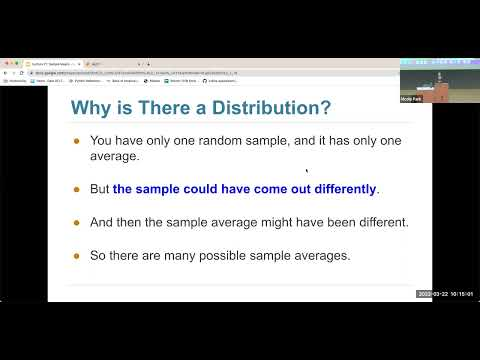

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('bB37NOEBnZM', width=800, height=300, start = 263)

## Distribution of the Sample Average

In [ ]:
united = Table.read_table('data/united.csv')
united_bins = np.arange(-20,300,10)
united.hist('Delay', bins=united_bins)

In [ ]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)
population_mean, population_sd

In [ ]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay')) 

In [ ]:
def ten_thousand_sample_means(sample_size):
    """Approximte the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means


In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column("Mean of 400 flight delays", sample_means_400).hist(bins = 20)
print("Population Average:", population_mean)

How many possible ways are there that the sample could have come out?

In [ ]:
united.num_rows

In [ ]:
# How many possible sample means are there?
united.num_rows ** 400

In [ ]:
sample_means_900 = ten_thousand_sample_means(900)

In [ ]:
means_tbl = Table().with_columns(
    "400",sample_means_400,
    "900", sample_means_900,
)

In [ ]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title("Distribution Of Sample Average");

### Relationship Between Population SD and Sample Size

In [ ]:
"""Empirical distribution of random sample means"""
def plot_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)

    # Print some information about the distribution of the sample means
    print("Sample size", sample_size)
    print("Population mean:", population_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel("Sample Means")
    plots.title("Sample Size " + str(sample_size))

In [ ]:
plot_sample_means(100)

In [ ]:
34.87/ 3.445

In [ ]:
plot_sample_means(400)

In [ ]:
34.87/ 1.753

In [ ]:
plot_sample_means(625)

In [ ]:
34.87/ 1.37

In [ ]:
34.87/ np.sqrt(100)

In [ ]:
34.87/ np.sqrt(400)

In [ ]:
34.87/ np.sqrt(625)

### Variability of the Sample Mean

In [ ]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [ ]:
sd_table = Table().with_columns(
    "Sample size", sample_sizes,
    "SD of simulated sample means", sample_mean_sds,
    "Pop SD/ sqrt(sample size)", population_sd/np.sqrt(sample_sizes),
)
sd_table

In [ ]:
sd_table.scatter("Sample size")

### Other distributions

In [ ]:
sf_salaries = Table.read_table("data/san_francisco_2015.csv")
sf_salaries.hist("Salaries")

In [ ]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_salaries = sf_salaries.sample(sample_size)
    return np.mean(sampled_salaries.column('Salaries')) 



In [ ]:
def ten_thousand_sample_means(sample_size):
    """Approximte the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column("Mean of 400 salaries", sample_means_400).hist(bins=20)
print("Population Average", np.mean(sf_salaries.column("Salaries")))